### Introduction
RFM analysis is a powerful technique used by companies to better understand customer behaviour and optimize engagement strategies. It revolves around three key dimensions: recency, frequency, and monetary value. These dimensions capture essential aspects of customer transactions, providing valuable information for segmentation and personalized marketing campaigns.

The given dataset is provided by an e-commerce platform containing customer transaction data including customer ID, purchase date, transaction amount, product information, ID command and location. The platform aims to leverage RFM (recency, frequency, monetary value) analysis to segment customers and optimize customer engagement strategies.

####  Task

-   [x] Perform RFM analysis on the given dataset and segment customers into different groups based on their RFM scores.
-   [x] Provide a detailed analysis of the customer segments and actionable insights for the platform to optimize customer engagement strategies.
-   [x] The analysis should provide insights into cusotmer behavior and identification of high-value customers, at-risk customers, and potential opportunities for personalized marketing campaigns.

In [1]:
#load necessary libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
data= pd.read_csv('rfm_data.csv')
data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [3]:

def info(data):
    print('Dataframe shape: ', data.shape)
    print('Number of null values: ', data.isnull().sum().sum())
    print('Number of duplicated values: ', data.duplicated().sum())
    print('Number of unique values: ', data.nunique())
    print('Dataframe info: ', data.info())
    print('Dataframe describe: ', data.describe())
    print('Dataframe columns: ', data.columns)
    print('Dataframe head: ', data.head())
info(data)

Dataframe shape:  (1000, 6)
Number of null values:  0
Number of duplicated values:  0
Number of unique values:  CustomerID             946
PurchaseDate            61
TransactionAmount      997
ProductInformation       4
OrderID               1000
Location                 4
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB
Dataframe info:  None
Dataframe describe:          CustomerID  TransactionAmount        OrderID
count  1000.000000         1000.00000    1000.000000
mean

In [4]:
from datetime import datetime
#convert 'PurchaseDate' to datetime
data['PurchaseDate'] = pd.to_datetime(data['PurchaseDate'])
#calculate Recency
data['Recency'] = (pd.Timestamp.now().normalize() - data['PurchaseDate'].dt.normalize()).dt.days
#calculate Frequency
frequency = data.groupby('CustomerID')['OrderID'].count().reset_index()
frequency.rename(columns={'OrderID':'Frequency'}, inplace=True)
data = data.merge(frequency, on='CustomerID', how='left')

#calculate Monetary
monetary = data.groupby('CustomerID')['TransactionAmount'].sum().reset_index()
monetary.rename(columns={'TransactionAmount':'Monetary'}, inplace=True)
data = data.merge(monetary, on='CustomerID', how='left')

In [5]:
#explore PurchaseDate and its dtype and display the first 5 rows
print(data['PurchaseDate'].dtype)
print(data['PurchaseDate'].head())


datetime64[ns]
0   2023-04-11
1   2023-04-11
2   2023-04-11
3   2023-04-11
4   2023-04-11
Name: PurchaseDate, dtype: datetime64[ns]


In [6]:
data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,Monetary
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,97,1,943.31
1,2188,2023-04-11,463.70,Product A,176819,London,97,1,463.70
2,4608,2023-04-11,80.28,Product A,340062,New York,97,1,80.28
3,2559,2023-04-11,221.29,Product A,239145,London,97,1,221.29
4,9482,2023-04-11,739.56,Product A,194545,Paris,97,1,739.56


In [7]:
#calculate the RFM scores
data['R'] = pd.qcut(data['Recency'], 5, labels=[5, 4, 3, 2, 1])
data['F'] = pd.qcut(data['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
data['M'] = pd.qcut(data['Monetary'], 5, labels=[1, 2, 3, 4, 5])
#calculate the RFM score and display the first 5 rows
data['RFM Score'] = data[['R','F','M']].sum(axis=1)
data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,Monetary,R,F,M,RFM Score
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,97,1,943.31,1,1,5,7
1,2188,2023-04-11,463.70,Product A,176819,London,97,1,463.70,1,1,3,5
2,4608,2023-04-11,80.28,Product A,340062,New York,97,1,80.28,1,1,1,3
3,2559,2023-04-11,221.29,Product A,239145,London,97,1,221.29,1,1,1,3
4,9482,2023-04-11,739.56,Product A,194545,Paris,97,1,739.56,1,1,4,6


In [8]:
#convert RFM scores to numeric type
data['RFM Score'] = data['RFM Score'].astype(int)
#explore the RFM score and its dtype
print(data['RFM Score'].dtype)
print(data['RFM Score'].head())

int32
0    7
1    5
2    3
3    3
4    6
Name: RFM Score, dtype: int32


#### RFM Value Segmentations

In [9]:
#create a function to segment the customers
def segment(x):
    if x >= 9:
        return 'High Value'
    elif x >= 5 and x < 9:
        return 'Mid Value'
    else:
        return 'Low Value'
#apply the function to the RFM score and create a new variable
data['Segment Values'] = data['RFM Score'].apply(segment)
#explore the first 5 rows
data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment Values
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,97,1,943.31,1,1,5,7,Mid Value
1,2188,2023-04-11,463.70,Product A,176819,London,97,1,463.70,1,1,3,5,Mid Value
2,4608,2023-04-11,80.28,Product A,340062,New York,97,1,80.28,1,1,1,3,Low Value
3,2559,2023-04-11,221.29,Product A,239145,London,97,1,221.29,1,1,1,3,Low Value
4,9482,2023-04-11,739.56,Product A,194545,Paris,97,1,739.56,1,1,4,6,Mid Value


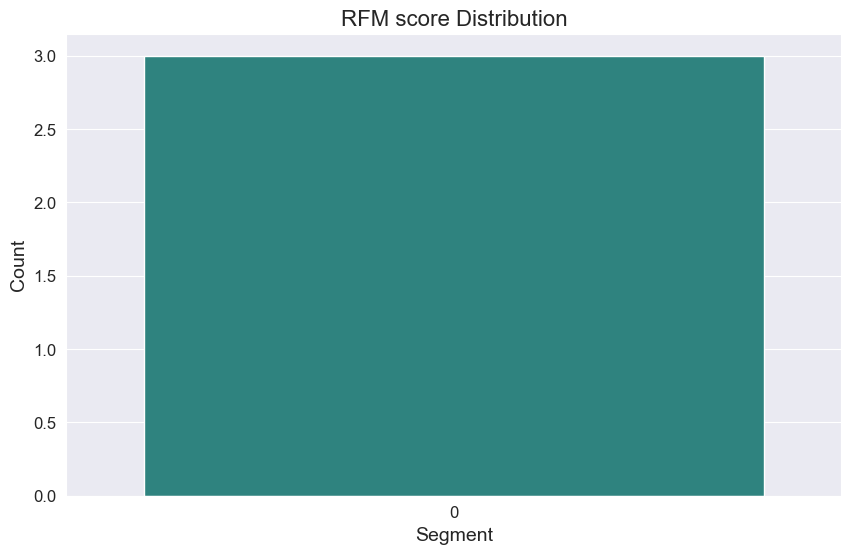

In [11]:
#Segment distribution
plt.figure(figsize=(10,6))
sns.countplot(data['Segment Values'].value_counts(), palette='viridis')
plt.title('RFM score Distribution', fontsize=16)
plt.xlabel('Segment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [16]:
#rfm segement distribution
segment_counts = data['Segment Values'].value_counts().reset_index()
segment_counts.columns = ['Segment Values', 'Count']
segment_counts.head()


,Segment Values,Count
0,High Value,573
1,Mid Value,347
2,Low Value,80


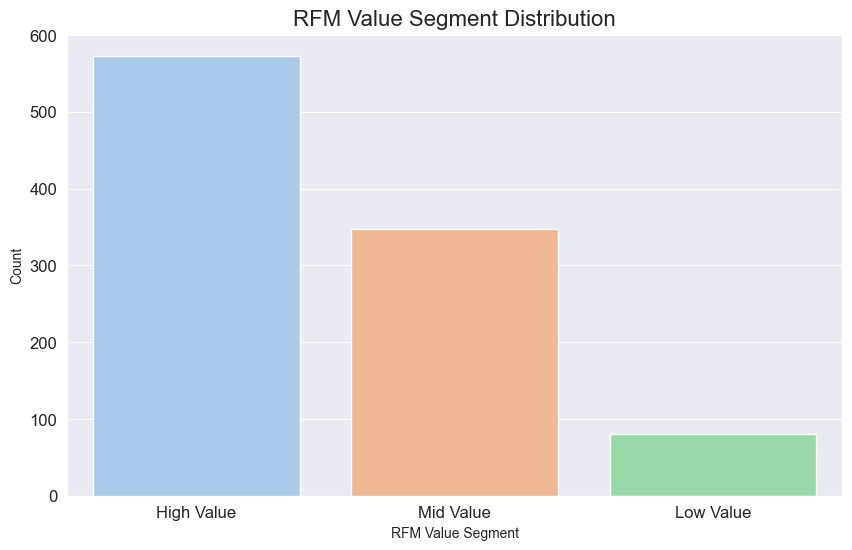

In [17]:
#create a bar chart to visualize the segment count distribution
pastel_colors = sns.color_palette('pastel')
#create a bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='Segment Values', y='Count', data=segment_counts, palette=pastel_colors)
plt.title('RFM Value Segment Distribution', fontsize=16)
plt.xlabel('RFM Value Segment')
plt.ylabel('Count')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### RFM Cusomer Segements

In [18]:
#create a new column for RFM customer segments
data['RFM Customer Segments'] = ''
#assign the RFM customer segments
data.loc[data['RFM Score'] >= 9, 'RFM Customer Segments'] = 'Champions'
data.loc[(data['RFM Score'] >= 6) & (data['RFM Score'] < 9), 'RFM Customer Segments'] = 'Potential'
data.loc[(data['RFM Score'] >= 5) & (data['RFM Score'] < 6), 'RFM Customer Segments'] = 'At-Risk Customers'
data.loc[(data['RFM Score'] >= 4) & (data['RFM Score'] <5), 'RFM Customer Segments'] = 'Can\'t Lose Them'
data.loc[(data['RFM Score']>=3) & (data['RFM Score'] <4), 'RFM Customer Segments'] = 'Lost Customers'

#print the updated data with RFM segments
print(data[['CustomerID','RFM Score','RFM Customer Segments']])



     CustomerID  RFM Score RFM Customer Segments
0          8814          7             Potential
1          2188          5     At-Risk Customers
2          4608          3        Lost Customers
3          2559          3        Lost Customers
4          9482          6             Potential
..          ...        ...                   ...
995        2970         14             Champions
996        6669         15             Champions
997        8836         13             Champions
998        1440         14             Champions
999        4759         14             Champions

[1000 rows x 3 columns]


#### RFM ANALYSIS

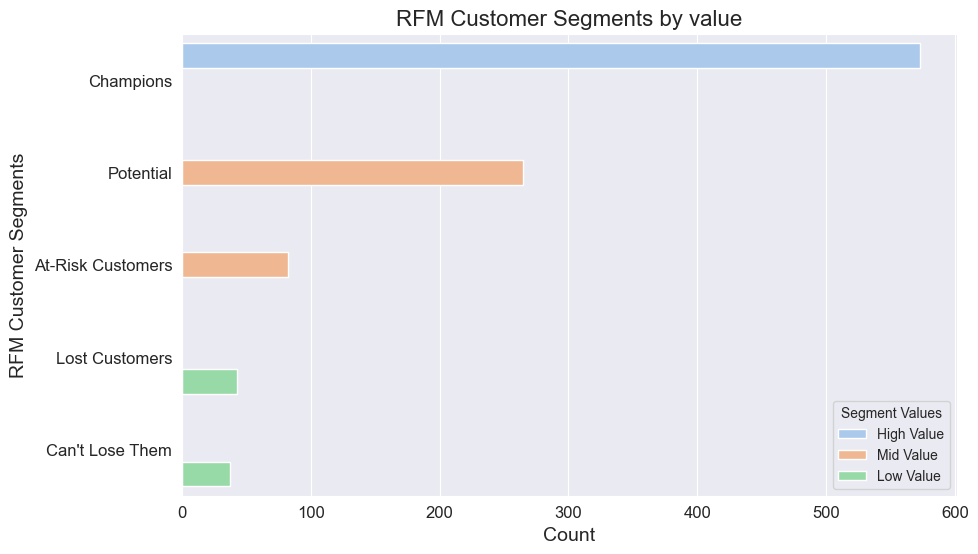

In [19]:
segment_product_counts = data.groupby(['Segment Values','RFM Customer Segments']).size().reset_index(name='Count')
segment_product_counts = segment_product_counts.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=segment_product_counts, x='Count', y='RFM Customer Segments', hue='Segment Values', palette=pastel_colors)
plt.title('RFM Customer Segments by value', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('RFM Customer Segments', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12) 
plt.show()

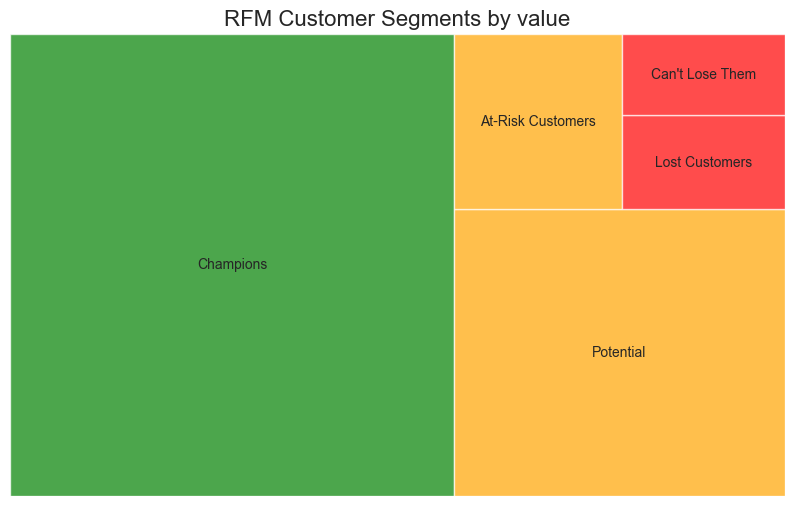

In [24]:
import squarify

segment_product_counts = data.groupby(['Segment Values','RFM Customer Segments']).size().reset_index(name='Count')
segment_product_counts = segment_product_counts.sort_values(by='Count', ascending=False)

# Assign colors to each segment value
colors = {'High Value': 'green', 'Mid Value': 'orange', 'Low Value': 'red'}

# Create a list of colors for each segment value
color_list = [colors[val] for val in segment_product_counts['Segment Values']]

# Create a treemap using squarify
plt.figure(figsize=(10,6))
squarify.plot(sizes=segment_product_counts['Count'], label=segment_product_counts['RFM Customer Segments'], color=color_list, alpha=0.7)
plt.axis('off')
plt.title('RFM Customer Segments by value', fontsize=16)
plt.show()

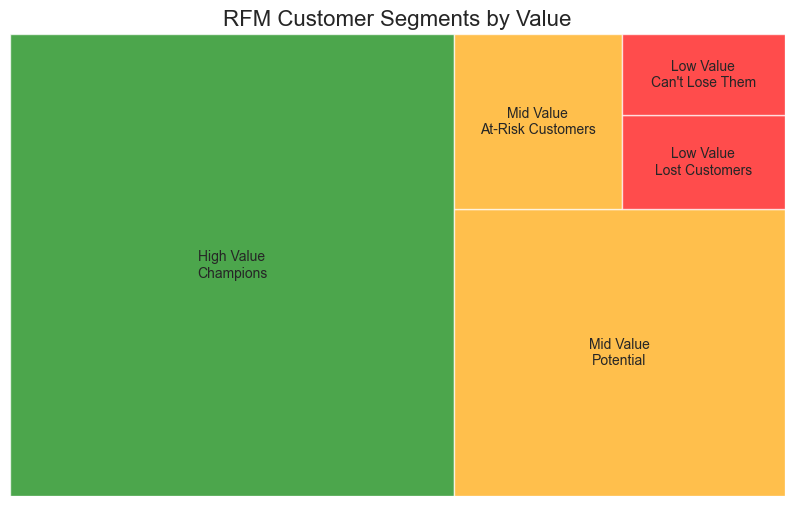

In [27]:
import squarify
import matplotlib.pyplot as plt

segment_product_counts = data.groupby(['Segment Values', 'RFM Customer Segments']).size().reset_index(name='Count')
segment_product_counts = segment_product_counts.sort_values(by='Count', ascending=False)

# Assign colors to each segment value
colors = {'High Value': 'green', 'Mid Value': 'orange', 'Low Value': 'red'}

# Create a list of colors for each segment value
color_list = [colors[val] for val in segment_product_counts['Segment Values']]

# Create a treemap using squarify
plt.figure(figsize=(10,6))
squarify.plot(sizes=segment_product_counts['Count'], label=[f"{x}\n{y}" for x, y in zip(segment_product_counts['Segment Values'], segment_product_counts['RFM Customer Segments'])], color=color_list, alpha=0.7)
plt.axis('off')
plt.title('RFM Customer Segments by Value', fontsize=16)
plt.show()

In [30]:
import plotly.express as px

segment_product_counts = data.groupby(['Segment Values', 'RFM Customer Segments']).size().reset_index(name='Count')
segment_product_counts = segment_product_counts.sort_values(by='Count', ascending=False)

# Assign colors to each segment value
colors = {'High Value': 'green', 'Mid Value': 'orange', 'Low Value': 'red'}

# Create a treemap using Plotly
fig = px.treemap(segment_product_counts, 
                 path=['Segment Values', 'RFM Customer Segments'], 
                 values='Count',
                 color='Segment Values', color_discrete_map=colors,
                 title='RFM Customer Segments by Value')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed